### Use decision trees to prepare a model on fraud data.
#### Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Fraud_check.csv')

## Data Exploration

In [3]:
df.sample(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
13,NO,Married,61830,86649,16,YES
245,NO,Single,33810,183221,24,NO
25,NO,Divorced,31417,124606,27,YES
89,YES,Married,26741,176050,20,NO
591,YES,Single,27394,132859,18,YES


In [4]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df.rename(columns = {'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'}, inplace = True)

In [7]:
df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [9]:
df.describe()

,Taxable_Income,City_Population,Work_Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [10]:
df['Fraud_Check'] = [0 if x<=30000 else 1 for x in df['Taxable_Income']] # 0 for Risky and 1 for Good

In [11]:
df.sample(4)

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Fraud_Check
70,YES,Divorced,89302,80904,3,YES,1
322,NO,Divorced,48392,160932,24,YES,1
239,NO,Divorced,99109,76145,26,NO,1
366,YES,Married,33356,131469,30,NO,1


## Data Visualization

In [12]:
categorical_features = df.describe(include=["object"]).columns
categorical_features

Index(['Undergrad', 'Marital_Status', 'Urban'], dtype='object')

In [13]:
numerical_features = df.describe(include=["int64"]).columns
numerical_features

Index(['Taxable_Income', 'City_Population', 'Work_Experience', 'Fraud_Check'], dtype='object')

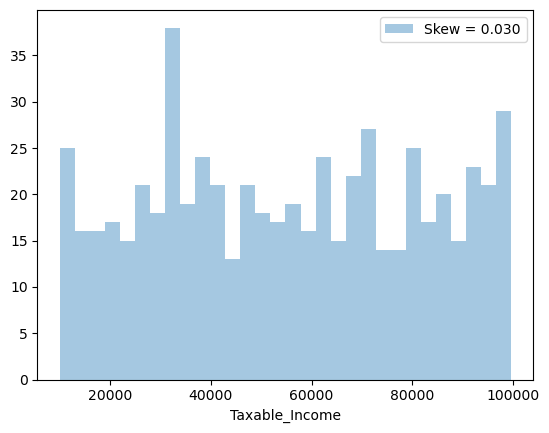

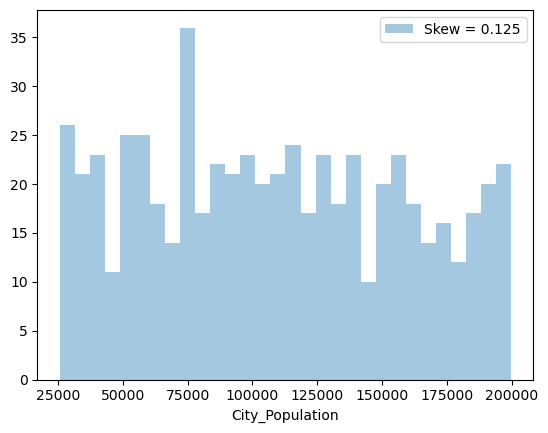

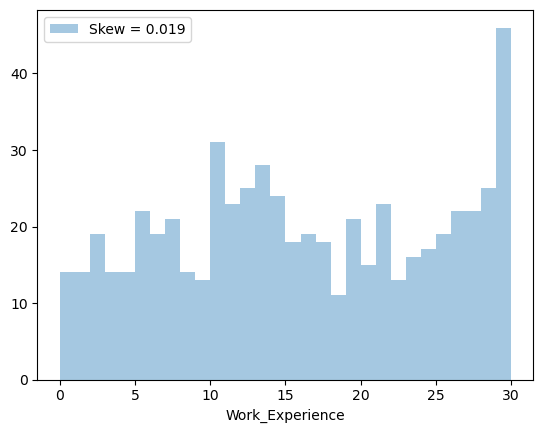

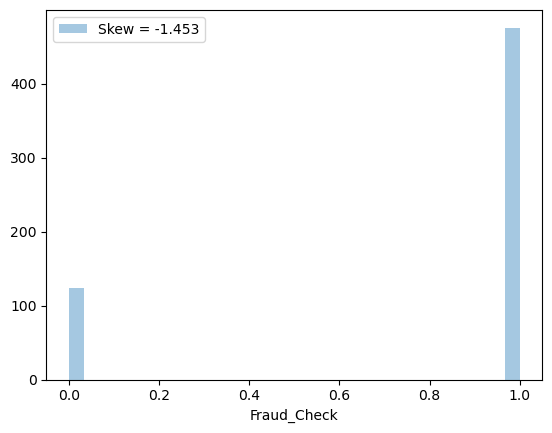

In [14]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

### We can infer that the target is imbalanced.

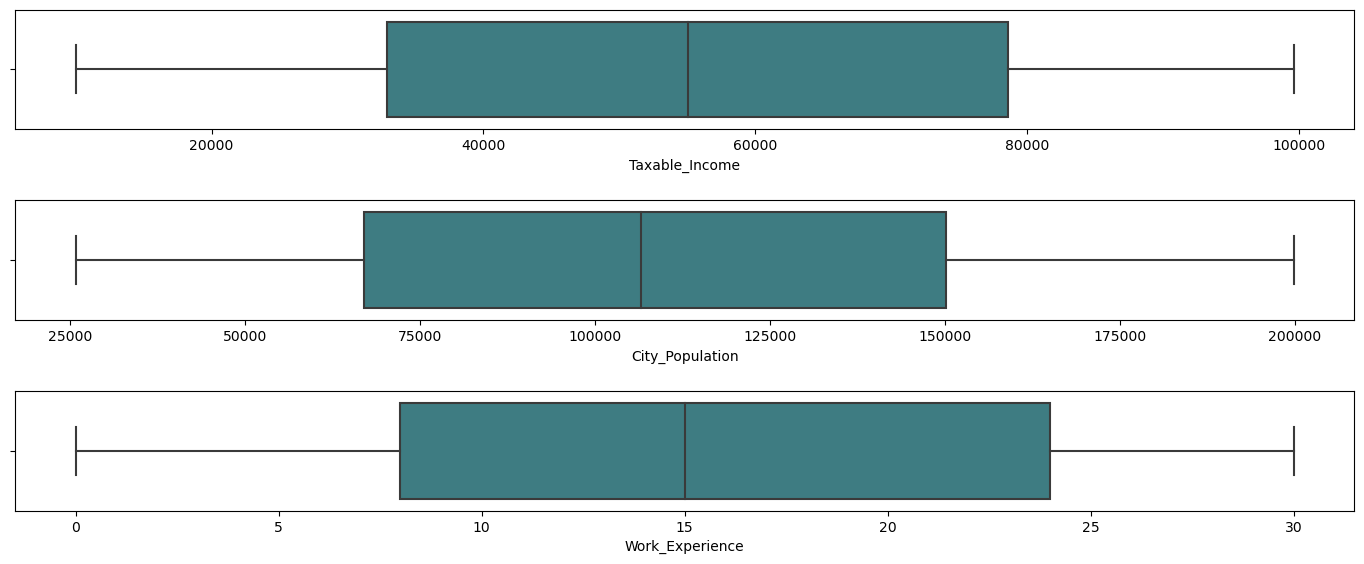

In [16]:
## Detecting outlier using boxplot

ot=df.copy() 
fig, axes=plt.subplots(3,1,figsize=(14,6),sharex=False,sharey=False)
sns.boxplot(x='Taxable_Income',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='City_Population',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Work_Experience',data=ot,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

## Multivariate Analysis

<Figure size 800x800 with 0 Axes>

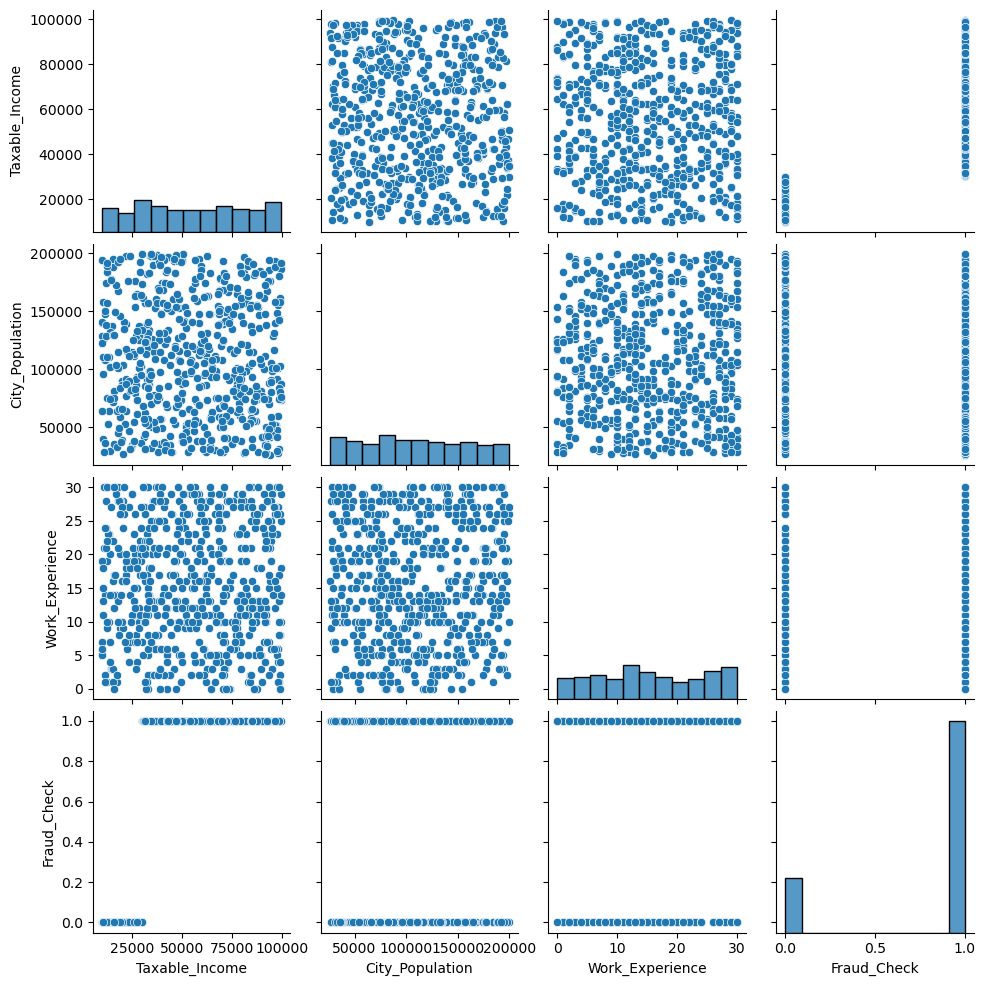

In [17]:
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='coolwarm')
plt.show()

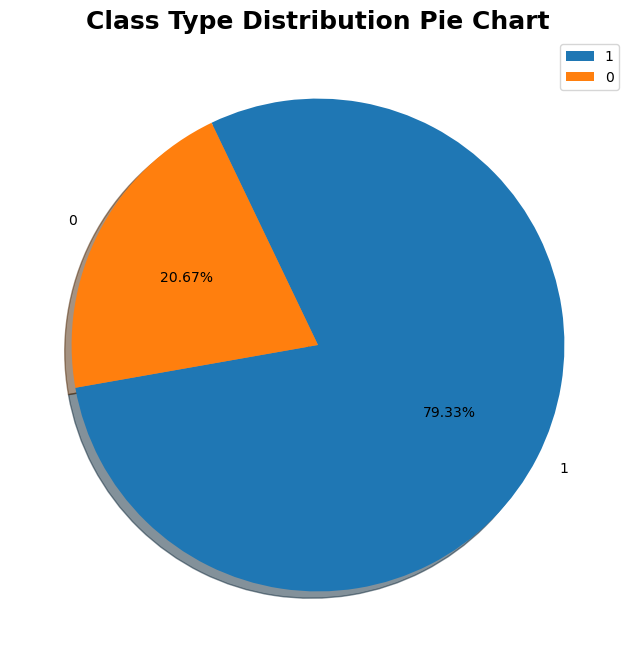

In [20]:
plt.figure(figsize = (12,8))
plt.pie(df['Fraud_Check'].value_counts(),
       labels=df.Fraud_Check.unique(),
       
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190)
plt.legend(loc= 'best')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### Unable to draw any inferences from this pairplots

## Data Preprocessing.

In [21]:
 df = pd.get_dummies(df) # One Hot encoding for Input variables

In [22]:
df.head()

,Taxable_Income,City_Population,Work_Experience,Fraud_Check,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,1,0,0,0,1,0,1
1,33700,134075,18,1,0,1,1,0,0,0,1
2,36925,160205,30,1,1,0,0,1,0,0,1
3,50190,193264,15,1,0,1,0,0,1,0,1
4,81002,27533,28,1,1,0,0,1,0,1,0


In [23]:
# Split the Data into X and Y

X = df.drop(columns={'Fraud_Check'})
y = df.iloc[:,3]

In [24]:
X.head()

,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Fraud_Check, dtype: int64

In [26]:
# Create X_tain, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 5)

In [27]:
dt = DecisionTreeClassifier(max_depth= 1)

In [28]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [30]:
y_pred1 = dt.predict(X_test)

In [31]:
accuracy_score(y_test,y_pred1)

1.0

In [32]:
dt.feature_importances_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

[Text(0.5, 0.75, 'x[0] <= 30055.5\ngini = 0.339\nsamples = 480\nvalue = [104, 376]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 104\nvalue = [104, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 376\nvalue = [0, 376]')]

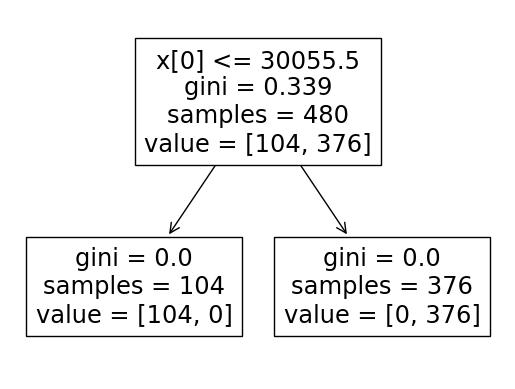

In [34]:
# Visualizing the Tree
from sklearn.tree import plot_tree

plot_tree(dt)

In [35]:
y_pred = dt.predict(X_test)

In [37]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00       100

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



### As we are splitting the taxable income as per problem statement, its completely depending on the Taxable income from
### We are getting 100% accuracy
### important features list we can see only Taxable income is affecting the target variable, 
### Inference Drawn - its a biased dataset, Hence most of the models would perform well in this case.